### Andrew Seeley
### Oct. 16, 2024
#### Professor Nancy Binowski
#### Project 1, Part 3: Data Analysis & Visualization
This project is intended to practice visualizing, exploring, and cleaning datasets with the IT Department's survey results. Part 3 uses the cleaned dataset to produce data visualizations about the survey results, which can then be used to make recommendations for future IT department recruitment efforts.

### First, we need to import pandas and the cleaned dataset. We can use exploratory functions to review it's features.

In [ ]:
import pandas as pd
datafile = "CLEANED Majors Survey Results - Fall 2024.csv"
surveys = pd.read_csv(datafile)

In [ ]:
surveys.info()

In [ ]:
surveys.shape

In [ ]:
surveys.columns

In [ ]:
surveys.head()

In [ ]:
surveys.tail()

### Now that we've reviewed the data, we can start answering some questions about it. We'll need to import the matplotlib package to create some plots.

In [ ]:
import matplotlib.pyplot as plot

### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### Question 1: What are the major motivations why computing majors seek a computing degree/certificate?

To start, we'll have to rule out any rows where the degree is not a computing major (Computer Science, IT, Game Dev, Digital Media Technology, Technical Studies, Information Security, Data Analytics and Web Development). Then we can make a subset of only the motivation columns.

In [ ]:
surveys.degree.unique() #Find all unique degrees to determine which ones are IT and should be included

In [ ]:
it_degrees = ['Game Development', 'Computer Science', 'Information Security Certificate of Achievement', 'Information Technology', 'Cybersecurity', 
              'Data Science', 'Data Analytics Certificate of Achievement', 'Web Development Certificate of Achievement']

In [ ]:
itmajors = surveys[surveys['degree'].isin(it_degrees)]

In [ ]:
motivators = itmajors[['tech_job_motive', # Create a new dataframe only containing the motivator columns
       'bach_motive', 'hs_cred_motive', 'career_adv_motive',
       'career_change_motive', 'prof_dev_motive', 'job_displacement_motive',
       'relo_motive', 'keep_curr_motive', 'it_cert_motive', 'financial_motive',
       'pers_enrich_motive']]

We can double check the subsetted data to make sure it only contains the motivation columns, and only for IT department major

In [ ]:
motivators.columns

Lastly, let's determine how many students responded yes for each motivation.

In [ ]:
mot_yes_counts = motivators.apply(pd.Series.value_counts).loc['Yes'] #This counts the number of 'Yes' responses for each column and saves them in a series.
mot_yes_counts /= len(motivators) / 100 #Convert the counts to a percentage

In [ ]:
sorted_mot_yes = mot_yes_counts.sort_values(ascending = True) #We can sort the series of yes counts in each column in ascending order.
sorted_mot_yes 

Now the data is ready to create some plots. Let's make a bar chart, where the x axis is the motivations and the y axis is the percentage of computing students who responded 'Yes' to having those motivations.

In [ ]:
colors = ['red']*3 + ['#eaeaea']*6 + ['green']*3
sorted_mot_yes.plot(kind='barh', color=colors)
plot.title('Motivations for Computing Majors Seeking an IT Degree/Certificate')
plot.xlabel('% of Students')
plot.ylabel('Motivation')

#### Conclusions: The top 3 motivators for CCM computing majors to seek an IT degree or certificate are landing a tech job, pursuing a Bachelor's degree, and personal enrichment. 3 of the bottom 4 motivators are related to major life changes, such as changing jobs or relocation.

#### Recommendations: It may help to advertise how CCM's programs and services would support someone going through difficult life changes, increasing the motivation for those needing a fresh start to register in CCM's IT department. Older demographics are more likely to face these challenges, so recruitment efforts should be targeted toward the older audience. Young college age students are already motivated by the idea of landing a tech job or a Bachelor's degree - therefore they don't seem to need anymore motivation from the college.

### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### Question 2: What activities/experiences are most effective at persuading students to take a computing class?

We can use similar strategies from question 1 to subset our data. We'll have to isolate the columns pertaining to activities/experiences, than determine how many students responded 'Yes' for each column.

In [ ]:
surveys.columns 

In [ ]:
activities = surveys[['open_house', 'inst_dec_day', 'campus_info_ses', 'virt_info_ses',
       'women_who_dare', 'college_fair', 'hs_sharetime', 'challenger',
       'cybersec_info_prot_prog', 'hs_info_ses', 'hs_campus_visit',
       'indiv_campus_visit', 'wfd_class', 'corp_training', 'teen_arts',
       'ccm_summer_camp']]

In [ ]:
act_yes_counts = activities.apply(pd.Series.value_counts).loc['Yes'] #This counts the number of 'Yes' responses for each column and saves them in a series.
act_yes_counts /= len(activities) / 100 #Convert the counts to a percentage

In [ ]:
sorted_act_yes = act_yes_counts.sort_values(ascending = True) #We can sort the series of yes counts in each column in ascending order.
sorted_act_yes 

We can make a similar plot as question 1, with each activity plotted against the percentage of students who said they were influenced to take a computing class by said activity.

In [ ]:
colors = ['#eaeaea']*12 + ['green']*4
sorted_act_yes.plot(kind='barh', color=colors)
plot.title('What Activities/Experiences Influence Students to take a Computing Class?')
plot.xlabel('% of Students Influenced')
plot.ylabel('Activity')

#### Conclusions: No one activity seems to impact more than 20-25% of current students. The most influential experiences are campus visits, information sessions, and open houses.

#### Recommendations: It seems wise to focus recruitment efforts in high schools, where most prospective students would be, as well as continuing to improve the quality of information sessions and open houses. These avenues far outperform the less popular activities, though efforts should be made to spread awareness and participation to a higher precentage of students throughout.

### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### Question 3: Where do most students get information about the IT department?

The set up here is once again similar to questions 1 and 2. We can subset out the columns based on experiences, then determine how many students answered 'Yes', that they were influenced by said activity to take a computing class.

In [ ]:
surveys.columns

In [ ]:
info = surveys[['heard_from_counselor', 'heard_from_teacher',
       'heard_from_it_site', 'heard_from_admissions', 'heard_from_advisor',
       'heard_from_employer', 'heard_from_ccm_wfd', 'heard_from_nj_wfd',
       'heard_from_other']]

In [ ]:
info_yes_counts = info.apply(pd.Series.value_counts).loc['Yes'] #This counts the number of 'Yes' responses for each column and saves them in a series.
info_yes_counts /= len(info) / 100 #Convert the counts to a percentage

In [ ]:
sorted_info_yes = info_yes_counts.sort_values(ascending = True) #We can sort the series of yes counts in each column in ascending order.
sorted_info_yes 

Again, we can use a bar chart to visualize which information sources reach the most students.

In [ ]:
colors = ['red']*3 + ['#eaeaea']*3 + ['green']*3
sorted_info_yes.plot(kind='barh', color=colors)
plot.title('Where Students get Information About the CCM IT Department')
plot.xlabel('% of Students Reached')
plot.ylabel('Info Source')

#### Conclusions: College information sources reach the most students, followed by high school information sources. Very few students get information about CCM's IT department through workforce development programs or employers.

#### Recommendations: Continue to provide information through college services and the IT website, as it seems to be where most students go to learn more. Look into the workforce development program for opportunities to make information more available.

### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
### Question 4: Among students who changed their original major to a computing degree, what were the most common motivators that made them choose a computing degree instead? Does looking at only those who switched majors make a difference?

We already have a subset of the computing majors from question 1. Our first step is to filter out any rows where a computing major was their first choice, or they switched from one computing major to another. At the end, we'll only have the computing majors that switched from a non-computing major.

In [ ]:
itmajors.deg_before_it.unique() #Find all variations in the previous degree column that will need to be filtered out

In [ ]:
#Add any new variations of 'First Choice' or IT majors to the list of what will NOT be included
it_degrees += ['First Choice', 'Data Analytics and Statistics', 'Computer science', 'I did not change to any other major.', "Major didn't change"] 

In [ ]:
#Subset of those whose previous degree was not IT
switched = itmajors[~itmajors['deg_before_it'].isin(it_degrees)]

In [ ]:
switched

Now that we have the proper subset of majors, we can isolate the columns for just the motivations and determine which were the most influential.

In [352]:
# Create a new subset only containing the motivator columns
switch_mot = switched[['tech_job_motive', 
       'bach_motive', 'hs_cred_motive', 'career_adv_motive',
       'career_change_motive', 'prof_dev_motive', 'job_displacement_motive',
       'relo_motive', 'keep_curr_motive', 'it_cert_motive', 'financial_motive',
       'pers_enrich_motive']]

In [356]:
switch_yes_counts = switch_mot.apply(pd.Series.value_counts).loc['Yes'] #This counts the number of 'Yes' responses for each column and saves them in a series.
switch_yes_counts /= len(switch_mot) / 100 #Convert the counts to a percentage

In [358]:
sorted_switch_yes = switch_yes_counts.sort_values(ascending = True) #We can sort the series of yes counts in each column in ascending order.
sorted_switch_yes 

job_displacement_motive     4.545455
relo_motive                 4.545455
hs_cred_motive             11.363636
career_change_motive       31.818182
keep_curr_motive           34.090909
it_cert_motive             36.363636
financial_motive           38.636364
prof_dev_motive            45.454545
pers_enrich_motive         47.727273
career_adv_motive          50.000000
bach_motive                59.090909
tech_job_motive            72.727273
Name: Yes, dtype: float64

And now we're ready to plot, using the same techniques as before.

Text(0, 0.5, 'Motivation')

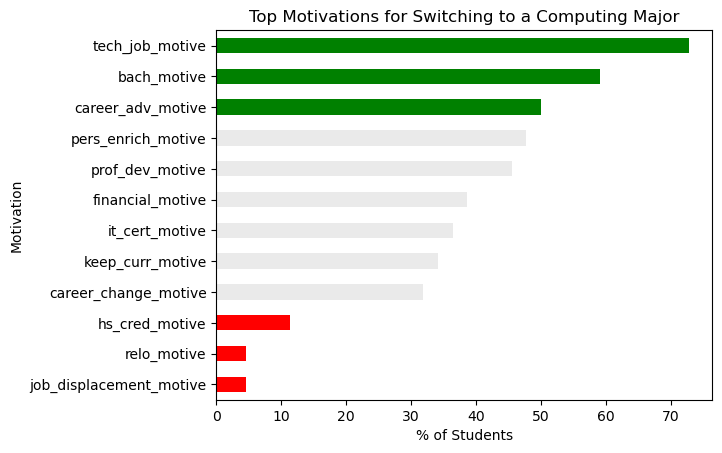

In [360]:
colors = ['red']*3 + ['#eaeaea']*6 + ['green']*3
sorted_switch_yes.plot(kind='barh', color=colors)
plot.title('Top Motivations for Switching to a Computing Major')
plot.xlabel('% of Students')
plot.ylabel('Motivation')

Let's also bring back our plot from question 1, to compare the motivations of all students with those who specificallt switched to an IT major from a non-IT major:

Text(0, 0.5, 'Motivation')

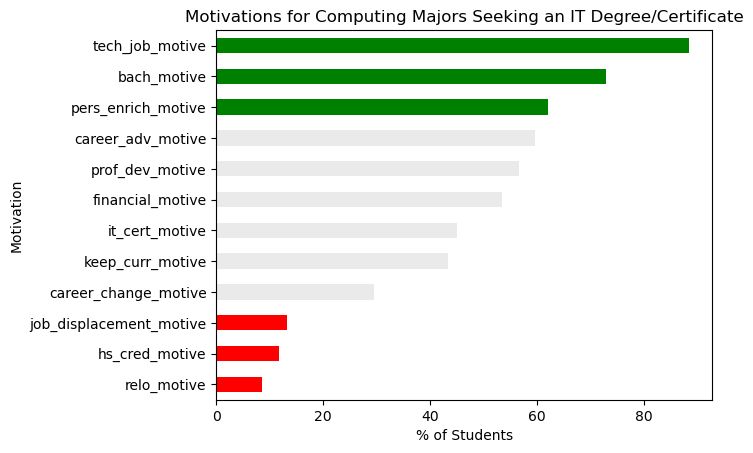

In [364]:
colors = ['red']*3 + ['#eaeaea']*6 + ['green']*3
sorted_mot_yes.plot(kind='barh', color=colors)
plot.title('Motivations for Computing Majors Seeking an IT Degree/Certificate')
plot.xlabel('% of Students')
plot.ylabel('Motivation')

#### Conclusions: Although there are slight variations, the motivations remain largely the same for most computing majors, whether an IT major was their first choice or not. Most of our computing majors are motivated to get a tech job, earn a Bachelor's degree, or pursue personal enrichment.

#### Recommendations: Continue to advertise in all areas of the campus so all students see the benefits of joining the IT department, regardless of their current major. Since most students choose computing majors for the same reasons, emphasize their job prospects and available transfer programs.